# 資料準備

In [51]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.examples.tutorials.mnist import input_data

import sys
sys.path.append('../')
from util.my_plot import layer,plot_images_labels_prediction, plot_batch, generate_shift_fashion_mnist_data

In [13]:
fashion_mnist = input_data.read_data_sets('input/data', one_hot=True)


Extracting input/data/train-images-idx3-ubyte.gz
Extracting input/data/train-labels-idx1-ubyte.gz
Extracting input/data/t10k-images-idx3-ubyte.gz
Extracting input/data/t10k-labels-idx1-ubyte.gz


# 建立模型

In [16]:
# 建立輸入層 x 

In [17]:
x = tf.placeholder("float", [None, 784])

In [18]:
# 建立隱藏層h1

In [19]:
h1=layer(output_dim=256,input_dim=784, inputs=x ,activation=tf.nn.relu)  


In [20]:
# 建立輸出層

In [21]:
y_predict=layer(output_dim=10,input_dim=256, inputs=h1,activation=None)


# 定義訓練方式

In [22]:
#建立訓練資料label真實值 placeholder

In [23]:
y_label = tf.placeholder("float", [None, 10])

In [24]:
#定義loss function

In [25]:
loss_function = tf.reduce_mean(
                  tf.nn.softmax_cross_entropy_with_logits(logits=y_predict, labels=y_label))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [26]:
#選擇optimizer

In [27]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)

# 定義評估模型的準確率

In [28]:
#計算每一筆資料是否正確預測

In [29]:
correct_prediction = tf.equal(tf.argmax(y_label  , 1),
                              tf.argmax(y_predict, 1))

In [30]:
#將計算預測正確結果，加總平均

In [31]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# 開始訓練

In [34]:
trainEpochs = 15
batchSize = 100
totalBatchs = int(fashion_mnist.train.num_examples/batchSize)
epoch_list=[]
val_loss_list=[];val_accuracy_list=[]
loss_list=[];accuracy_list=[]
from time import time
startTime=time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [35]:
print(totalBatchs)

550


In [37]:
# 進行多次實驗
for epoch in range(trainEpochs):
    # 每一步取一批做運算
    for i in range(totalBatchs):
        batch_x, batch_y = fashion_mnist.train.next_batch(batchSize)
        sess.run(optimizer,feed_dict={x: batch_x/255 ,y_label: batch_y})
    
    # 計算training data的準確度 
    loss,acc = sess.run([loss_function,accuracy], 
                        feed_dict={x: fashion_mnist.train.images/255, 
                                   y_label: fashion_mnist.train.labels})

    
    # 計算validate data的準確度 
    val_loss,val_acc = sess.run([loss_function,accuracy], 
                                feed_dict={x: fashion_mnist.validation.images/255, 
                                           y_label: fashion_mnist.validation.labels})

    
    epoch_list.append(epoch)
    loss_list.append(loss);accuracy_list.append(acc)    
    val_loss_list.append(val_loss);val_accuracy_list.append(val_acc)    
    print("Train Epoch:", '%02d' % (epoch+1), "Loss=", "{:.9f}".format(loss), " Accuracy=",acc ,"val Loss=", "{:.9f}".format(val_loss)," val_Accuracy=",val_acc  )
    
duration =time()-startTime
print("Train Finished takes:",duration)      

('Train Epoch:', '01', 'Loss=', '0.864396870', ' Accuracy=', 0.73896366, 'val Loss=', '0.848419726', ' val_Accuracy=', 0.744)
('Train Epoch:', '02', 'Loss=', '0.677873254', ' Accuracy=', 0.77805454, 'val Loss=', '0.662494838', ' val_Accuracy=', 0.7828)
('Train Epoch:', '03', 'Loss=', '0.599683106', ' Accuracy=', 0.79963636, 'val Loss=', '0.586616039', ' val_Accuracy=', 0.8068)
('Train Epoch:', '04', 'Loss=', '0.557581902', ' Accuracy=', 0.8098909, 'val Loss=', '0.544166088', ' val_Accuracy=', 0.8196)
('Train Epoch:', '05', 'Loss=', '0.531561017', ' Accuracy=', 0.81790906, 'val Loss=', '0.522315979', ' val_Accuracy=', 0.8288)
('Train Epoch:', '06', 'Loss=', '0.510635018', ' Accuracy=', 0.8240909, 'val Loss=', '0.504869699', ' val_Accuracy=', 0.827)
('Train Epoch:', '07', 'Loss=', '0.488798320', ' Accuracy=', 0.8321091, 'val Loss=', '0.482576549', ' val_Accuracy=', 0.8344)
('Train Epoch:', '08', 'Loss=', '0.482460856', ' Accuracy=', 0.8324, 'val Loss=', '0.475773633', ' val_Accuracy=', 0

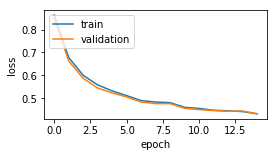

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, loss_list, label = 'loss')
plt.plot(epoch_list, val_loss_list, label = 'val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')


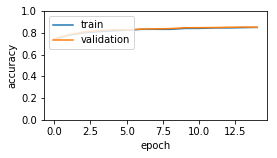

In [40]:
plt.plot(epoch_list, accuracy_list,label="accuracy" )
plt.plot(epoch_list, val_accuracy_list,label="accuracy" )

fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# 評估模型準確率

In [42]:
print("Accuracy:", sess.run(accuracy,
                           feed_dict={x: fashion_mnist.test.images/255,
                                      y_label: fashion_mnist.test.labels}))

('Accuracy:', 0.8344)


# 進行預測

In [43]:
prediction_result=sess.run(tf.argmax(y_predict,1),
                           feed_dict={x: fashion_mnist.test.images/255 })

In [44]:
prediction_result[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [45]:
fashion_mnist.test.images.shape
aa = fashion_mnist.test.images.reshape(10000,28,28)
prediction_result.shape
fashion_mnist.test.labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

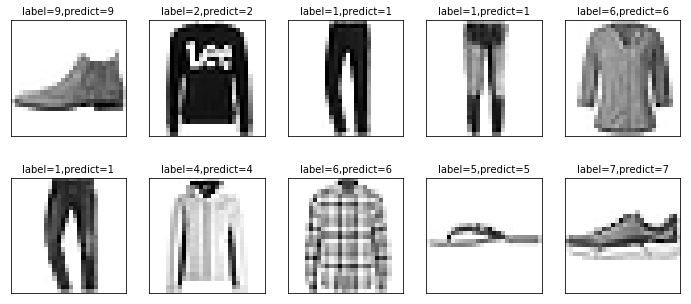

In [46]:
plot_images_labels_prediction(aa,
                              np.argmax(fashion_mnist.test.labels,axis=1),
                              prediction_result,0)

In [47]:
y_predict_Onehot=sess.run(y_predict,
                          feed_dict={x: fashion_mnist.test.images/255 })

In [48]:
y_predict_Onehot[8]

array([ 0.27966642, -0.6253054 ,  0.5045877 ,  1.4836514 , -0.7936645 ,
        4.7877636 ,  1.0576309 ,  3.3364987 ,  1.0766226 , -1.7904227 ],
      dtype=float32)

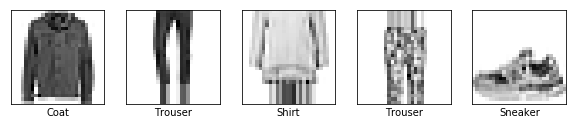

In [55]:
from util.my_plot import generate_shift_mnist_data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

shift_img, shift_img_label = generate_shift_fashion_mnist_data(10000)
plot_batch(shift_img, shift_img_label,class_names, 5)

In [53]:
from keras.utils import np_utils
bb = shift_img.reshape(10000, 784)
shift_img_label_OneHot = np_utils.to_categorical(shift_img_label)

In [54]:
print("Accuracy:", sess.run(accuracy,
                           feed_dict={x: bb/255,
                                      y_label: shift_img_label_OneHot}))

('Accuracy:', 0.504)


In [22]:
sess.close()